## Librerias usadas

In [1]:
!pip install folium

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
import folium

## Carga de datos

In [3]:
input_file_name_bicicletas = "bicicletas.xlsx"
input_sheet_name_bicicletas = "bicicletas"

In [4]:
input_file_name_covid = "covid.xlsx"
input_sheet_name_covid = "covid"

In [5]:
input_file_name_subte = "subte.xlsx"
input_sheet_name_subte = "subte"

In [6]:
input_file_name_vehiculos = "vehiculos.xlsx"
input_sheet_name_vehiculos = "vehiculos"

In [7]:
input_file_name_contaminantes = "contaminantes.xlsx"
input_sheet_name_contaminantes = "contaminantes"

In [8]:
input_file_name_estacionesAmbientales = "estaciones-ambientales.xlsx"
input_sheet_name_estacionesAmbientales = "estaciones-ambientales"

In [9]:
input_file_name_calidadAire = "calidad-aire.xlsx"
input_sheet_name_calidadAire = "calidad-aire"

# CALIDAD DE AIRE

### CONTAMINANTES

In [10]:
df_contaminantes = pd.read_excel(input_file_name_contaminantes, sheet_name = input_sheet_name_contaminantes)
df_contaminantes

,id,nombre,descripcion
0,1,CO,Monóxido de Carbono (en ppm - partes por milló...
1,2,NO2,Dióxido de Nitrógeno (en ppb - part per billon...
2,3,PM10,Material Particulado respirable menor a 10 mic...


### UBICACION DE LAS ESTACIONES

In [11]:
estaciones = pd.read_excel(input_file_name_estacionesAmbientales, sheet_name = input_sheet_name_estacionesAmbientales)
estaciones

,X,Y,NOMBRE,DIRECCION,INICIO_DE_ACTIVIDAD,ZONA_DE_EMPLAZAMIENTO,EN_RED,PARAMETROS_MEDIDOS,CALLE,ALTURA,CRUCE,CP,CPA
0,"-58,3663735070165","-34,6252584813295",LA BOCA,AV. BRASIL 100,01/05/2009,ZONA MIXTA CON FLUJO VEHICULAR MEDIO-BAJO E IN...,01/09/2009,"CO, NO, NO2, NOX, PM10",BRASIL AV.,100.0,NaN,1063.0,C1063AAB
1,"-58,4320717652753","-34,6066080998154",CENTENARIO,RAMOS MEJÃA 800,01/01/2005,(PARQUE CENTENARIO) AREA RESIDENCIAL-COMERCIAL...,NaN,"CO, NO, NO2, NOX, PM10",RAMOS MEJIA,800.0,NaN,1405.0,C1405CAD
2,"-58,391552893462","-34,5995643433432",CORDOBA,AV. CORDOBA Y RODRIGUEZ PEÃA,01/05/2009,AREA RESIDENCIAL-COMERCIAL CON FLUJO VEHICULAR...,NaN,"CO, NO, NO2, NOX, PM10",CORDOBA AV.,NaN,RODRIGUEZ PEï¿½A,NaN,NaN
3,"-58,4053598727298","-34,5834529467442",PALERMO,AV. LAS HERAS Y ORTIZ DE OCAMPO,01/01/2002,ESTACION DESACTIVADA DESDE 30/06/2010 AREA RES...,NaN,"CO, NO, NO2, NOX, PM10",LAS HERAS GENERAL AV.,NaN,ORTIZ DE OCAMPO,NaN,NaN


In [12]:
lat = (estaciones.loc[:,'X'])
lat = [pd.to_numeric(i.replace(',','.')) for i in lat]
la_bocaX = lat[0]
centenarioX = lat[1]
cordobaX = lat[2]
palermoX = lat[3]

lon = estaciones.loc[:,'Y']
lon = [pd.to_numeric(i.replace(',','.')) for i in lon]
la_bocaY = lon[0]
centenarioY = lon[1]
cordobaY = lon[2]
palermoY = lon[3]

lon =  -58.38162
lat = -34.60376


m = folium.Map(location = [lat, lon], zoom_start = 10)
folium.TileLayer(tiles= "OpenStreetMap").add_to(m)
folium.TileLayer(tiles= "Stamen Terrain").add_to(m)
folium.TileLayer(tiles= "Stamen Toner").add_to(m)
folium.TileLayer(tiles= "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles= "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location= [la_bocaY,la_bocaX], popup= 'LA BOCA').add_to(m)
folium.Marker(location= [centenarioY,centenarioX], popup= 'CENTENARIO').add_to(m)
folium.Marker(location= [cordobaY,cordobaX], popup= 'CORDOBA').add_to(m)
folium.Marker(location= [palermoY,palermoX], popup= 'PALERMO').add_to(m)
m

### CALIDAD DE AIRE

In [13]:
calidad_aire = pd.read_excel(input_file_name_calidadAire, sheet_name = input_sheet_name_calidadAire)
calidad_aire

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO
0,05MAR2010:00:00:00,22,s/d,s/d,NaN,s/d,26,NaN,0.20,s/d,NaN,0.98,NaN,NaN
1,07MAR2010:00:00:00,9,s/d,s/d,NaN,s/d,28,NaN,0.35,s/d,NaN,1.23,NaN,NaN
2,08MAR2010:00:00:00,14,s/d,s/d,NaN,s/d,37,NaN,0.08,s/d,NaN,1.29,NaN,NaN
3,09MAR2010:00:00:00,18,s/d,s/d,NaN,s/d,40,NaN,0.20,24,NaN,1.00,NaN,NaN
4,09MAR2010:00:00:00,23,s/d,s/d,NaN,s/d,30,NaN,0.19,20,NaN,0.93,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103620,17MAR2018:00:00:00,23,0.55,12,13,0.74,12,17,0.84,13,28,NaN,NaN,NaN
103621,05OCT2015:00:00:00,9,0.18,15,18,0.21,17,17,0.15,11,13,NaN,NaN,NaN
103622,22OCT2020:00:00:00,8,0.22,10,18,0.37,33,15,s/d,15,21,NaN,NaN,NaN
103623,09JUL2021:00:00:00,23,s/d,20,25,0.31,s/d,24,s/d,15,29,NaN,NaN,NaN


Estandarizacion de fecha y seleccion de periodo de estudio.

In [14]:
fecha = []
for i in calidad_aire['FECHA'] :
  aFecha = i[0:2] + '-' + i[2:5] + '-' + i[5:9]
  fecha.append(aFecha)

In [15]:
calidad_aire['nuevaFecha'] = pd.to_datetime(fecha)

In [16]:
df_2020 = calidad_aire.loc[calidad_aire['nuevaFecha'].between('2020-01-01','2020-12-31')]
df_2020

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO,nuevaFecha
10163,12MAR2020:00:00:00,19,s/d,77,18,0.71,37,s/d,s/d,s/d,s/d,NaN,NaN,NaN,2020-03-12
10164,12MAR2020:00:00:00,23,0.96,39,19,0.68,27,s/d,s/d,s/d,s/d,NaN,NaN,NaN,2020-03-12
10165,13MAR2020:00:00:00,2,0.75,19,20,0.60,13,s/d,s/d,20,s/d,NaN,NaN,NaN,2020-03-13
10166,13MAR2020:00:00:00,18,0.54,32,18,0.52,23,s/d,s/d,27,s/d,NaN,NaN,NaN,2020-03-13
10167,12APR2020:00:00:00,13,0.48,5,9,s/d,1,7,0.27,s/d,8,NaN,NaN,NaN,2020-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103535,22NOV2020:00:00:00,21,0.24,9,18,0.49,26,13,s/d,12,16,NaN,NaN,NaN,2020-11-22
103549,22OCT2020:00:00:00,1,0.29,4,19,0.44,16,16,s/d,7,23,NaN,NaN,NaN,2020-10-22
103604,03APR2020:00:00:00,23,0.67,25,9,0.78,20,s/d,s/d,s/d,12,NaN,NaN,NaN,2020-04-03
103611,07FEB2020:00:00:00,6,0.54,11,18,0.63,s/d,s/d,s/d,s/d,s/d,NaN,NaN,NaN,2020-02-07


#### LIMPIEZA DE DATOS

Se desestima la estacion de PALERMO, ya que en el periodo de tiempo a analizar todos sus valores son nulos, en el caso de LA BOCA mas del 50 % de los datos son 's/d'

In [17]:
df_2020.isnull().sum(axis=0)

FECHA                 0
HORA                  0
CO_CENTENARIO        19
NO2_CENTENARIO       19
PM10_CENTENARIO      19
CO_CORDOBA           19
NO2_CORDOBA          19
PM10_CORDOBA         20
CO_LA_BOCA           19
NO2_LA_BOCA          19
PM10_LA_BOCA         19
CO_PALERMO         8683
NO2_PALERMO        8683
PM10_PALERMO       8683
nuevaFecha            0
dtype: int64

In [18]:
df_2020.isin(['s/d']).sum(axis=0)

FECHA                 0
HORA                  0
CO_CENTENARIO        19
NO2_CENTENARIO       66
PM10_CENTENARIO       0
CO_CORDOBA         2385
NO2_CORDOBA         915
PM10_CORDOBA       1672
CO_LA_BOCA         6630
NO2_LA_BOCA        5102
PM10_LA_BOCA       4416
CO_PALERMO            0
NO2_PALERMO           0
PM10_PALERMO          0
nuevaFecha            0
dtype: int64

In [19]:
df = df_2020.loc[:, ('nuevaFecha','CO_CENTENARIO','NO2_CENTENARIO','PM10_CENTENARIO','CO_CORDOBA','NO2_CORDOBA','PM10_CORDOBA')]

In [20]:
df.isnull().sum(axis=0)

nuevaFecha          0
CO_CENTENARIO      19
NO2_CENTENARIO     19
PM10_CENTENARIO    19
CO_CORDOBA         19
NO2_CORDOBA        19
PM10_CORDOBA       20
dtype: int64

In [21]:
df = df.melt(id_vars= ['nuevaFecha'], value_vars= ['CO_CENTENARIO', 'NO2_CENTENARIO', 'PM10_CENTENARIO','CO_CORDOBA', 'NO2_CORDOBA', 'PM10_CORDOBA'], var_name= "concepto", value_name= "value")
df

,nuevaFecha,concepto,value
0,2020-03-12,CO_CENTENARIO,s/d
1,2020-03-12,CO_CENTENARIO,0.96
2,2020-03-13,CO_CENTENARIO,0.75
3,2020-03-13,CO_CENTENARIO,0.54
4,2020-04-12,CO_CENTENARIO,0.48
...,...,...,...
52093,2020-11-22,PM10_CORDOBA,13
52094,2020-10-22,PM10_CORDOBA,16
52095,2020-04-03,PM10_CORDOBA,s/d
52096,2020-02-07,PM10_CORDOBA,s/d


In [22]:
pd.to_numeric(df['value'] , errors= 'coerce').isnull().sum(axis=0)

5220

In [23]:
df['valores_'] = pd.to_numeric(df['value'] , errors= 'coerce')

In [24]:
df = df.dropna()

In [25]:
df['mes']= df['nuevaFecha'].dt.month

<ipython-input-25-b34d54a60dc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes']= df['nuevaFecha'].dt.month


Separo contaminante de la estacion, para generar posteriormente las columnas contaminante y estacion

In [26]:
df['contaminante'] =  [ i.split('_')[0] for i in df['concepto']]
df['estacion'] = [ i.split('_')[1] for i in df['concepto']]

<ipython-input-26-e5e27e789e44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contaminante'] =  [ i.split('_')[0] for i in df['concepto']]
<ipython-input-26-e5e27e789e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estacion'] = [ i.split('_')[1] for i in df['concepto']]


Por tener distintas unidades, separo el dataset por contaminante, agrupo por mes y valor promedio de los valores

In [27]:
df_CO = df.loc[df['contaminante'] == 'CO',:]
df_NO2 = df.loc[df['contaminante'] == 'NO2',:]
df_PM10 = df.loc[df['contaminante'] == 'PM10',:]

In [28]:
#Agrupo por mes y estacion, valor promedio 
df_CO =(df_CO
      .groupby(['mes','estacion'],as_index = False)
      .agg({'valores_' : 'mean'}) )

df_NO2 =(df_NO2
      .groupby(['mes','estacion'],as_index = False)
      .agg({'valores_' : 'mean'}) )

df_PM10 = (df_PM10
      .groupby(['mes','estacion'],as_index = False)
      .agg({'valores_' : 'mean'}) )

In [29]:
df_CO['INTERVALO']=pd.cut(df_CO['valores_'],10,labels=[1,2,3,4,5,6,7,8,9,10])
df_CO['INTERVALO']=df_CO['INTERVALO'].astype(int)

In [30]:
df_NO2['INTERVALO']=pd.cut(df_NO2['valores_'],10,labels=[1,2,3,4,5,6,7,8,9,10])
df_NO2['INTERVALO']=df_NO2['INTERVALO'].astype(int)

In [31]:
df_PM10['INTERVALO']=pd.cut(df_PM10['valores_'],10,labels=[1,2,3,4,5,6,7,8,9,10])
df_PM10['INTERVALO']=df_PM10['INTERVALO'].astype(int)

In [32]:
df_PM10

,mes,estacion,valores_,INTERVALO
0,1,CENTENARIO,20.648611,6
1,1,CORDOBA,21.750853,7
2,2,CENTENARIO,18.397989,5
3,2,CORDOBA,20.601643,6
4,3,CENTENARIO,17.529570,4
5,3,CORDOBA,13.679443,2
6,4,CENTENARIO,14.089080,2
7,4,CORDOBA,11.601587,1
8,5,CENTENARIO,19.995833,6
9,5,CORDOBA,18.571717,5


<Figure size 1080x540 with 0 Axes>

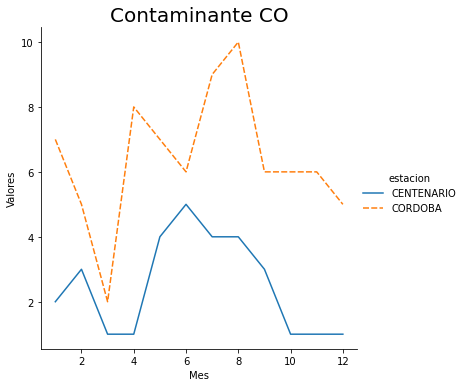

<Figure size 1080x540 with 0 Axes>

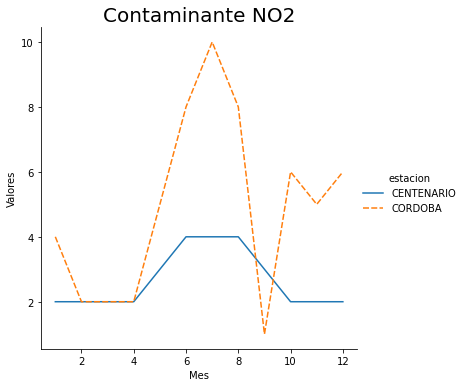

<Figure size 1080x540 with 0 Axes>

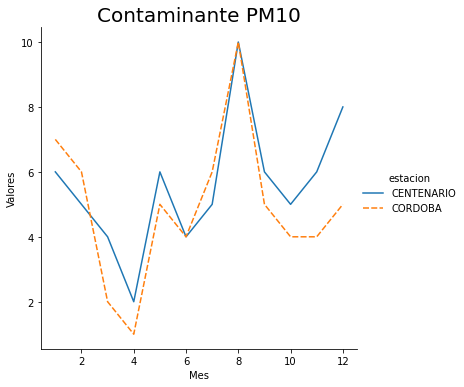

In [33]:
plt.figure(figsize=(15,7.5))

sns.relplot(data=df_CO,
            x="mes",
            y="INTERVALO",
            hue="estacion",
            style="estacion",
            kind="line",
            dashes = True
            )
plt.title("Contaminante CO", fontsize = 20)
plt.ylabel('Valores')
plt.xlabel('Mes')
plt.show()

plt.figure(figsize=(15,7.5))
sns.relplot(data=df_NO2,
            x="mes",
            y="INTERVALO",
            hue="estacion",
            style="estacion",
            kind="line",
            )
plt.title("Contaminante NO2", fontsize = 20)
plt.ylabel('Valores')
plt.xlabel('Mes')
plt.show()

plt.figure(figsize=(15,7.5))
sns.relplot(data=df_PM10,
            x="mes",
            y="INTERVALO",
            hue="estacion",
            style="estacion",
            kind="line",
            )
plt.title("Contaminante PM10", fontsize = 20)
plt.ylabel('Valores')
plt.xlabel('Mes')
plt.show()

# TRANSPORTE

In [34]:
df_bicicletas = pd.read_excel(input_file_name_bicicletas, sheet_name = input_sheet_name_bicicletas)
df_bicicletas

,AÑO,MES,TIPO,TOTAL,INTERVALO,DICIEMBRE_ENERO
0,2020,1,Bicicletas,159233,5,+100 %
1,2020,2,Bicicletas,116965,4,+100 %
2,2020,3,Bicicletas,52951,2,+100 %
3,2020,4,Bicicletas,0,1,+100 %
4,2020,5,Bicicletas,20235,1,+100 %
5,2020,6,Bicicletas,69707,3,+100 %
6,2020,7,Bicicletas,98328,3,+100 %
7,2020,8,Bicicletas,248180,8,+100 %
8,2020,9,Bicicletas,273719,9,+100 %
9,2020,10,Bicicletas,323130,10,+100 %


In [35]:
df_covid = pd.read_excel(input_file_name_covid, sheet_name = input_sheet_name_covid)
df_covid

,AÑO,MES,TIPO,TOTAL,INTERVALO,DICIEMBRE_ENERO
0,2020,1,Casos de Covid,97,1,+900 %
1,2020,2,Casos de Covid,30,1,+900 %
2,2020,3,Casos de Covid,643,1,+900 %
3,2020,4,Casos de Covid,4245,1,+900 %
4,2020,5,Casos de Covid,13178,2,+900 %
5,2020,6,Casos de Covid,31192,4,+900 %
6,2020,7,Casos de Covid,49358,7,+900 %
7,2020,8,Casos de Covid,57396,8,+900 %
8,2020,9,Casos de Covid,52179,7,+900 %
9,2020,10,Casos de Covid,52403,7,+900 %


In [36]:
df_subte = pd.read_excel(input_file_name_subte, sheet_name = input_sheet_name_subte)
df_subte

,AÑO,MES,TIPO,TOTAL,INTERVALO,DICIEMBRE_ENERO
0,2020,1,Subte,14431260,9,-77 %
1,2020,2,Subte,14379523,9,-77 %
2,2020,3,Subte,16665570,10,-77 %
3,2020,4,Subte,2532868,1,-77 %
4,2020,5,Subte,2769479,1,-77 %
5,2020,6,Subte,3566230,1,-77 %
6,2020,7,Subte,3417198,1,-77 %
7,2020,8,Subte,3122951,1,-77 %
8,2020,9,Subte,3629713,1,-77 %
9,2020,10,Subte,4966696,2,-77 %


In [37]:
df_vehiculos = pd.read_excel(input_file_name_vehiculos, sheet_name = input_sheet_name_vehiculos)
df_vehiculos

,AÑO,MES,TIPO,TOTAL,INTERVALO,DICIEMBRE_ENERO
0,2020,1,Vehículos,248546,10,-10 %
1,2020,2,Vehículos,232209,9,-10 %
2,2020,3,Vehículos,197980,6,-10 %
3,2020,4,Vehículos,143191,1,-10 %
4,2020,5,Vehículos,171215,3,-10 %
5,2020,6,Vehículos,212227,7,-10 %
6,2020,7,Vehículos,209202,7,-10 %
7,2020,8,Vehículos,213511,7,-10 %
8,2020,9,Vehículos,219852,8,-10 %
9,2020,10,Vehículos,226641,8,-10 %


In [38]:
df = pd.concat([df_bicicletas,df_covid,df_subte,df_vehiculos])

In [39]:
df['Diciembre Vs Enero'] = df['TIPO'] + " " + df['DICIEMBRE_ENERO']
df

,AÑO,MES,TIPO,TOTAL,INTERVALO,DICIEMBRE_ENERO,Diciembre Vs Enero
0,2020,1,Bicicletas,159233,5,+100 %,Bicicletas +100 %
1,2020,2,Bicicletas,116965,4,+100 %,Bicicletas +100 %
2,2020,3,Bicicletas,52951,2,+100 %,Bicicletas +100 %
3,2020,4,Bicicletas,0,1,+100 %,Bicicletas +100 %
4,2020,5,Bicicletas,20235,1,+100 %,Bicicletas +100 %
5,2020,6,Bicicletas,69707,3,+100 %,Bicicletas +100 %
6,2020,7,Bicicletas,98328,3,+100 %,Bicicletas +100 %
7,2020,8,Bicicletas,248180,8,+100 %,Bicicletas +100 %
8,2020,9,Bicicletas,273719,9,+100 %,Bicicletas +100 %
9,2020,10,Bicicletas,323130,10,+100 %,Bicicletas +100 %


In [40]:
sns.color_palette('pastel',12)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274)]

In [41]:
paleta_meses = {}
for i in range(0,12):
    paleta_meses[i+1] = sns.color_palette('pastel',12)[i]
paleta_meses

{1: (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 2: (1.0, 0.7058823529411765, 0.5098039215686274),
 3: (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 4: (1.0, 0.6235294117647059, 0.6078431372549019),
 5: (0.8156862745098039, 0.7333333333333333, 1.0),
 6: (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 7: (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 8: (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 9: (1.0, 0.996078431372549, 0.6392156862745098),
 10: (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 11: (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 12: (1.0, 0.7058823529411765, 0.5098039215686274)}

In [42]:
paleta_transportes = {}
for i in range(0,len(df['Diciembre Vs Enero'].value_counts().index)):
    paleta_transportes[df['Diciembre Vs Enero'].value_counts().index[i]] = sns.color_palette('pastel',12)[i]
paleta_transportes

{'Subte -77 %': (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 'Vehículos -10 %': (1.0, 0.7058823529411765, 0.5098039215686274),
 'Casos de Covid +900 %': (0.5529411764705883,
  0.8980392156862745,
  0.6313725490196078),
 'Bicicletas +100 %': (1.0, 0.6235294117647059, 0.6078431372549019)}

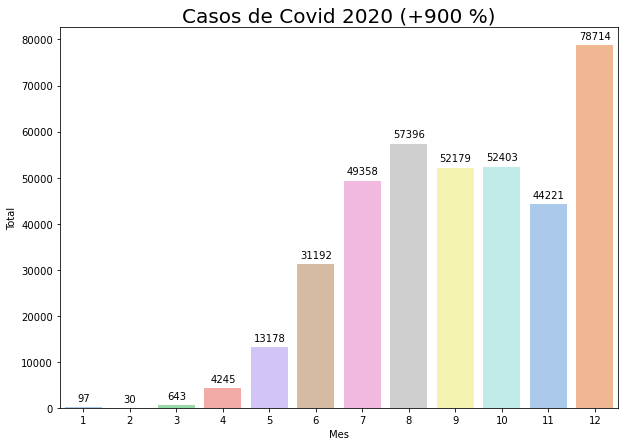

In [43]:
plt.figure(figsize=(10,7))
s = sns.barplot(data = df_covid,
            x = 'MES',
            y = 'TOTAL',
            palette = paleta_meses)
for p in s.patches:
    s.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Casos de Covid 2020 (" + df_covid.iloc[0][5] + ")", fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

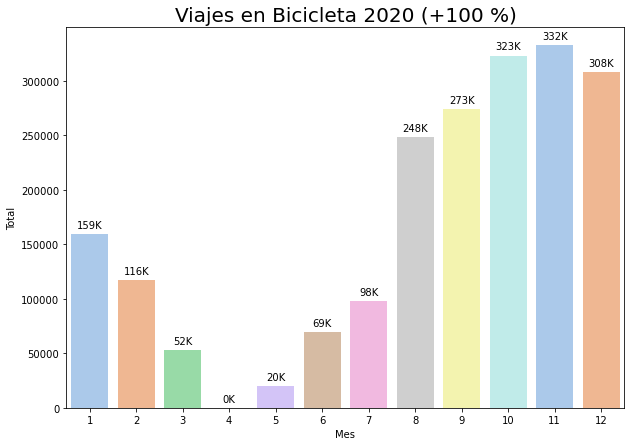

In [44]:
plt.figure(figsize=(10,7))
s = sns.barplot(data = df_bicicletas,
            x = 'MES',
            y = 'TOTAL',
            palette = paleta_meses)
for p in s.patches:
    s.annotate(str(int(p.get_height()/1000)) + 'K', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Viajes en Bicicleta 2020 (" + df_bicicletas.iloc[0][5] + ")", fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

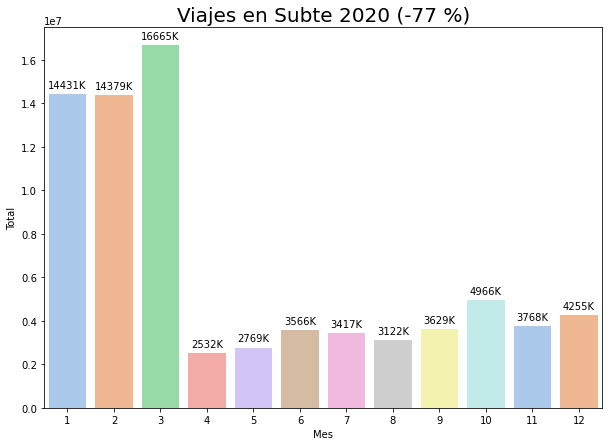

In [45]:
plt.figure(figsize=(10,7))
s = sns.barplot(data = df_subte,
            x = 'MES',
            y = 'TOTAL',
            palette = paleta_meses)
for p in s.patches:
    s.annotate(str(int(p.get_height()/1000)) + 'K', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Viajes en Subte 2020 (" + df_subte.iloc[0][5] + ")", fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

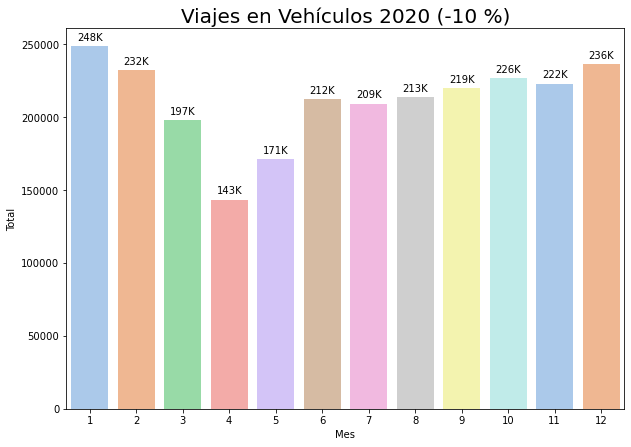

In [46]:
plt.figure(figsize=(10,7))
s = sns.barplot(data = df_vehiculos,
            x = 'MES',
            y = 'TOTAL',
            palette = paleta_meses)
for p in s.patches:
    s.annotate(str(int(p.get_height()/1000)) + 'K', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Viajes en Vehículos 2020 (" + df_vehiculos.iloc[0][5] + ")", fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

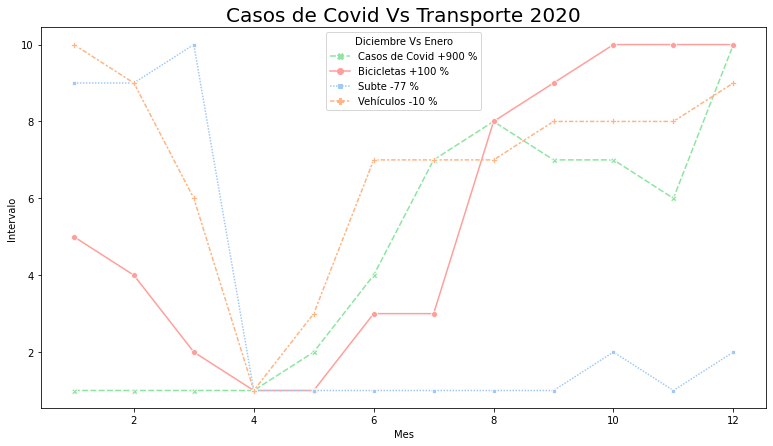

In [47]:
plt.figure(figsize=(13,7))
b = sns.lineplot(data = df,
            x = 'MES',
            y = 'INTERVALO',
            hue = 'Diciembre Vs Enero',
            hue_order = ['Casos de Covid ' +  df_covid.iloc[0][5],'Bicicletas ' + df_bicicletas.iloc[0][5],'Subte ' + df_subte.iloc[0][5],'Vehículos ' + df_vehiculos.iloc[0][5]],
            style = 'Diciembre Vs Enero',
            markers=True,
            dashes=True,
            palette = paleta_transportes)
plt.title("Casos de Covid Vs Transporte 2020", fontsize = 20)
plt.xlabel('Mes')
plt.ylabel('Intervalo')
plt.show()